# 

# Employee Attrition 



###  Problem statement: 
Employee attrition refers to the percentage of workers who leave an organization and are replaced by new employees. A high rate of attrition in an organization leads to increased recruitment, hiring and training costs. Not only it is costly, but qualified and competent replacements are hard to find.  The Attrition Prediction model estimates the attrition risk for your employee populations in real-time. The purpose of this case is to uncover the factors that lead to employee attrition and explore important drivers of employee attrition.




### Required Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib
from sklearn.model_selection import train_test_split
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,precision_recall_curve,plot_precision_recall_curve,f1_score,accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

### Uploading Dataset 

In [2]:
data = pd.read_csv('attrition.csv')
data.drop('Unnamed: 0',axis=1, inplace=True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life_Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research_Development,8,Below_College,Life_Sciences,High,Male,...,Outstanding,Very_High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research_Development,2,College,Other,Very_High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research_Development,3,Master,Life_Sciences,Very_High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research_Development,2,Below_College,Medical,Low,Male,...,Excellent,Very_High,1,6,3,Better,2,2,2,2


###  Function to evaluate performance of Classification model

In [3]:
def evaluate(model, Y_test, X_test,X_train,Y_train): 
    
    # predict the target on the train dataset
    predict_train = model.predict(X_train)

    # Accuray Score on train dataset
    accuracy_train = accuracy_score(Y_train,predict_train)
    print('Accuracy Score on train dataset : ', round(accuracy_train,2))

    # predict the target on the test dataset
    predict_test = model.predict(X_test)

    # Accuracy Score on test dataset
    accuracy_test = accuracy_score(Y_test,predict_test)
    print('Accuracy_score on test dataset : ', round(accuracy_test,2), '\n')
    
    precision = precision_score(Y_test,  predict_test)
    recall = recall_score(Y_test,  predict_test)
    accuracy= accuracy_score(Y_test,  predict_test)
    F1_score= f1_score(Y_test,  predict_test)

    print('Model Performance')
    print('Precision: {}'.format(round(precision,2)))
    print('Recall: {}'.format(round(recall,2)))
    print('Accuracy:{}'.format(round(accuracy,2)))
    print('F1-score: : {}'.format(round(F1_score,2)),'\n')

### Hint: use below mentioned method to call classification 

In [4]:
tree = DecisionTreeClassifier() # insteaed of DecisionTreeRegressor()
forest = RandomForestClassifier() # instead of RandomForestRegressor()
gbm = GradientBoostingClassifier() # instead of GradientBoostingRegressor()
xgbc = XGBClassifier()             #Instead of XGBRegresor()

# Questions

### 1.  Apply Proper Data Pre-Processing and EDA

In [5]:
data_gb = data.groupby('Attrition').mean()
data_gb

,Age,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,65.952149,2.145985,6832.739659,14265.779400,2.645580,15.231144,0.845093,11.862936,2.832928,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,65.573840,1.637131,4787.092827,14559.308017,2.940928,15.097046,0.527426,8.244726,2.624473,5.130802,2.902954,1.945148,2.852321


Once the mean analysis is done, there are clear differences between means for Attrition and Non-Attrition. There is a clear difference in Job Level, Income, Total Working Years & other year figures. However, this does not prove a statistical relationship just yet.

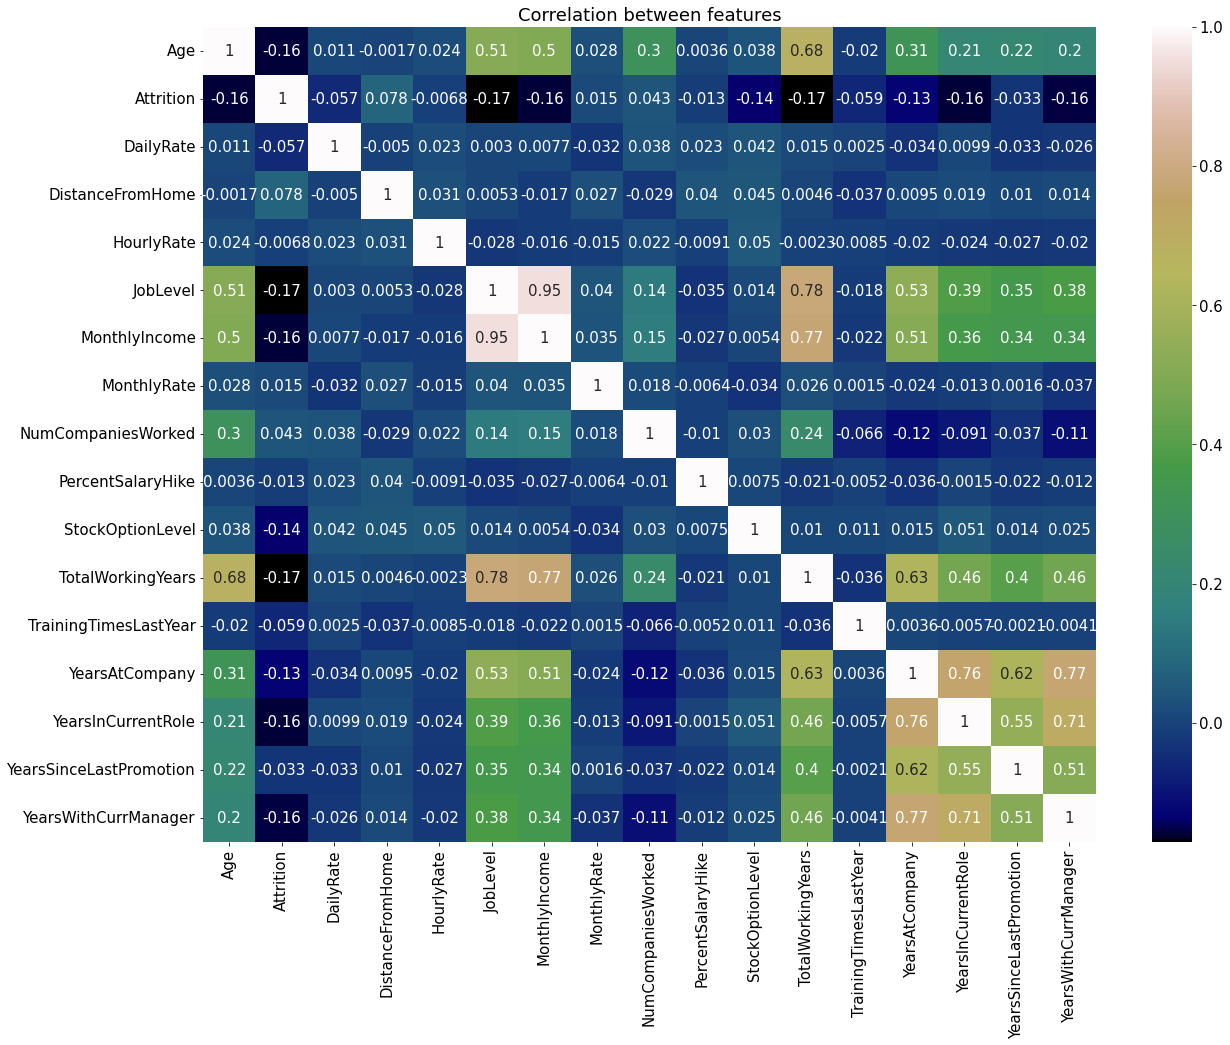

In [6]:
data.Attrition = data.Attrition.replace(to_replace=['No', 'Yes'], value=[0, 1])
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap='gist_earth')
plt.title("Correlation between features")
plt.show()

With many preditors, there is lots of correlated figures. In many classification methods, there is lots of overfitting when too many predictors are involved. To make analysis easier, I will only use 10 predictors. Given that these are only the quantitative values and that there are many more qualitative ones, few dummy variables will be made.

In [7]:
data = data[['Attrition','Age','JobLevel','JobInvolvement','PercentSalaryHike','MonthlyIncome','DistanceFromHome','Gender','WorkLifeBalance','EnvironmentSatisfaction']]
data_transformed = data.copy(deep = True)
data_transformed = pd.get_dummies(data_transformed, columns=data_transformed.columns[data_transformed.dtypes=='object'], drop_first=False)
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Attrition                          1470 non-null   int64
 1   Age                                1470 non-null   int64
 2   JobLevel                           1470 non-null   int64
 3   PercentSalaryHike                  1470 non-null   int64
 4   MonthlyIncome                      1470 non-null   int64
 5   DistanceFromHome                   1470 non-null   int64
 6   JobInvolvement_High                1470 non-null   uint8
 7   JobInvolvement_Low                 1470 non-null   uint8
 8   JobInvolvement_Medium              1470 non-null   uint8
 9   JobInvolvement_Very_High           1470 non-null   uint8
 10  Gender_Female                      1470 non-null   uint8
 11  Gender_Male                        1470 non-null   uint8
 12  WorkLifeBalance_Bad 

### 2. Split dataset to Trains and Test set (dont forget to set the seed)

In [8]:
#Split the data
X = data_transformed.loc[:,data_transformed.columns!='Attrition'].values
Y = data_transformed.loc[:, 'Attrition'].values

#Split the data into training and testing 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=28)

### 3. Fit Tree Classifier to the Train set (tune paramters) and evaluate performance using evalute() function

In [9]:
tree_1 = DecisionTreeClassifier(random_state = 28)

# fit the model with the training data
tree_1.fit(X_train,Y_train)

evaluate(tree_1, Y_test, X_test,X_train,Y_train)

Accuracy Score on train dataset :  1.0
Accuracy_score on test dataset :  0.8 

Model Performance
Precision: 0.46
Recall: 0.41
Accuracy:0.8
F1-score: : 0.43 



In [10]:
param_grid = {
    'max_depth': [20, 50, 80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5,10],
    'min_samples_split': [8, 10, 12 , 17],
    'random_state' : [28]
}

# Instantiate the grid search model
tree_cv = GridSearchCV(estimator = tree_1, param_grid = param_grid, scoring = 'r2', cv = 10, n_jobs = -1, verbose = 2)
tree_cv.fit(X_train, Y_train)
evaluate(tree_cv, Y_test, X_test,X_train,Y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Accuracy Score on train dataset :  0.86
Accuracy_score on test dataset :  0.8 

Model Performance
Precision: 0.43
Recall: 0.11
Accuracy:0.8
F1-score: : 0.17 



### 4. Fit Random Forest to the Train set (tune parameters) and evaluate performance using evalute() function

In [11]:
forest = RandomForestClassifier(n_estimators=10, random_state = 28)
forest.fit(X_train, Y_train)

evaluate(forest, Y_test, X_test,X_train,Y_train)


Accuracy Score on train dataset :  0.98
Accuracy_score on test dataset :  0.83 

Model Performance
Precision: 0.86
Recall: 0.11
Accuracy:0.83
F1-score: : 0.19 



In [12]:
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3,5, 10],
    'min_samples_split': [8, 10, 12],
    'random_state' : [28]
}
forest_cv = GridSearchCV(estimator = forest, param_grid = param_grid,  scoring = 'r2', cv = 10, n_jobs = -1, verbose = 2)
forest_cv.fit(X_train, Y_train)
evaluate(forest_cv, Y_test, X_test,X_train,Y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Accuracy Score on train dataset :  0.88
Accuracy_score on test dataset :  0.82 

Model Performance
Precision: 0.75
Recall: 0.05
Accuracy:0.82
F1-score: : 0.1 



### 5. Fit GBM  model to the Train Set and evaluate performance using evalute() function

In [13]:
gbm = GradientBoostingClassifier(n_estimators=100, max_depth=5,random_state = 28)
gbm.fit(X_train, Y_train)
evaluate(gbm, Y_test, X_test,X_train,Y_train)
#df=pd.DataFrame.from_dict(gbm_cv.cv_results_)
#print('Default setting of Decision Tree :', gbm.get_params())

Accuracy Score on train dataset :  0.97
Accuracy_score on test dataset :  0.81 

Model Performance
Precision: 0.52
Recall: 0.23
Accuracy:0.81
F1-score: : 0.32 



In [14]:
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
     'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
     'random_state' : [28]
    }
gbm_cv = GridSearchCV(estimator = gbm, param_grid = param_grid, scoring = 'r2',cv = 2, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, Y_train)
evaluate(gbm_cv, Y_test, X_test,X_train,Y_train)

Fitting 2 folds for each of 70 candidates, totalling 140 fits
Accuracy Score on train dataset :  0.85
Accuracy_score on test dataset :  0.81 

Model Performance
Precision: 0.0
Recall: 0.0
Accuracy:0.81
F1-score: : 0.0 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6. Fit XGBoost  model to the Train Set and evaluate performance using evalute() function

In [15]:
xgbc = XGBClassifier(random_state = 28)
xgbc.fit(X_train, Y_train)
evaluate(xgbc, Y_test, X_test,X_train,Y_train)
#print('Default setting of Decision Tree :', xgbc.get_params())

Accuracy Score on train dataset :  1.0
Accuracy_score on test dataset :  0.79 

Model Performance
Precision: 0.35
Recall: 0.14
Accuracy:0.79
F1-score: : 0.2 



In [16]:
param_grid = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
     'max_depth': [1,2,3,4,5,10],
     'random_state' : [28]
    }

xgbc_cv = GridSearchCV(estimator = xgbc, param_grid = param_grid, scoring = 'r2',cv = 2, n_jobs = -1, verbose = 2)
xgbc_cv.fit(X_train, Y_train)
evaluate(xgbc_cv, Y_test, X_test,X_train,Y_train)

#print('Default setting of Decision Tree :', xgbc.get_params())

Fitting 2 folds for each of 42 candidates, totalling 84 fits
Accuracy Score on train dataset :  0.85
Accuracy_score on test dataset :  0.81 

Model Performance
Precision: 0.33
Recall: 0.02
Accuracy:0.81
F1-score: : 0.03 



### 7. Compare the performance of four developed models

|                | Tree | Tree Tuned | RF   | RF Tuned | GBM  | GBM Tuned | XGB  | XGB Tuned |
|----------------|------|------------|------|----------|------|-----------|------|-----------|
| Train Accuracy | 1.00 | 0.86       | 0.99 | 0.88     | 0.97 | 0.85      | 1.00 | 0.85      |
| Test Accuracy  | 0.80 | 0.80       | 0.83 | 0.82     | 0.81 | 0.81      | 0.79 | 0.81      |
| Precision      | 0.46 | 0.43       | 0.86 | 0.75     | 0.52 | 0.00      | 0.35 | 0.33      |
| Recall         | 0.41 | 0.11       | 0.11 | 0.05     | 0.23 | 0.00      | 0.14 | 0.02      |
| Accuracy       | 0.80 | 0.80       | 0.83 | 0.82     | 0.81 | 0.81      | 0.79 | 0.81      |
| F1-Score       | 0.43 | 0.17       | 0.19 | 0.10     | 0.32 | 0.00      | 0.20 | 0.03      |

In terms of Test Accuracy, Random Forest before tuning was the best. However, since a lot are in the similar range, none of them stand out as the difference could be attributed to randomness.

As for precision, there is a big spread across all models and their two respective results. Random Forest Untuned is the best with 0.86 whilst XGBoost performed the worst in both cases with 0.35 and 0.33 respectively. All but RF have very porr precision suggesting there are many False Positives.

For recall, there is a big difference between models. The untuned Tree model is 0.41, much higher than the remaining which are in the 0.2-0.15 range. This suggests taht there are many false negatives in other models.

Accuracy is a measure of True Positives and True Negatives out the results. According to this Random forest is the best, but the numbers are very close across tuned and untuned results of all 4 models. 

F1-Score, being a combination of precision and recall, is a great comprehensive metric. According to it, GBM is the best model.

### 8. Is the data imbalance? Is it causing problem in your model(s)? which of them ? why?

In [17]:
data_transformed.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

There is a clear imbalance in the number of employees that left. This brings up many problems that are clearly visible in some metrics. GBM Tuned is a great example. It has 0 precision and recall but 0.81 accuracy meaning that it predicts 0 true positives - it predicts no employee should be leaving. But since its predicting everyone as staying, because of the data imbalance, it will be correct 0.81 percent of the time. In hindsight, the accuracy seems high with most in 0.8+ but that is simply because almost all points are predicted to be Attrition = 0. XGB somehow got worse than predicting everything as Attrition=0 suggesting it wrongly predicted some Attrition = 0s as 1. 

### 9. Derive important features using the best performed model

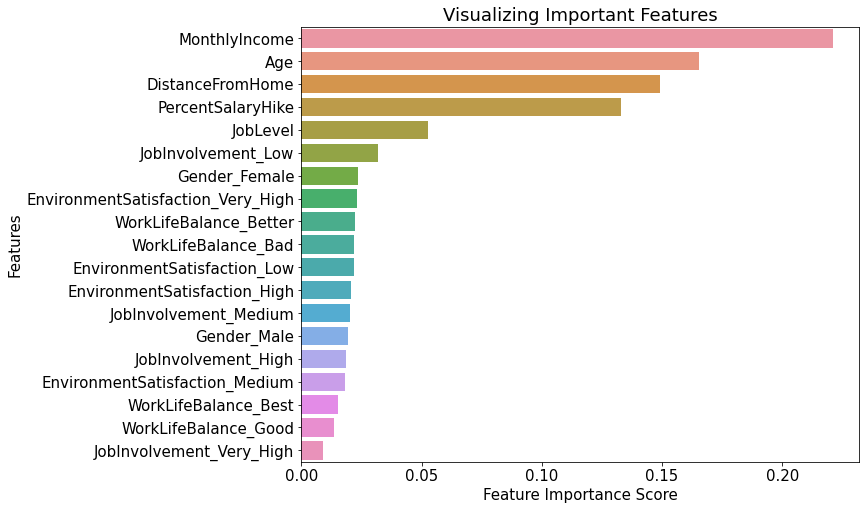

In [18]:
k=data_transformed.drop('Attrition', axis=1).columns
feature_imp = pd.Series(forest.feature_importances_,index=k).sort_values(ascending=False)
# Creating a bar plot
plt.figure(figsize=(10,8))
sns.barplot(x=feature_imp[feature_imp>0], y=feature_imp.index[feature_imp>0])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### 10. Add transparacy to your modeling results 

In [19]:
sns.set_palette('dark')
income_df = data
income_df.MonthlyIncome = round(data['MonthlyIncome']/1000)

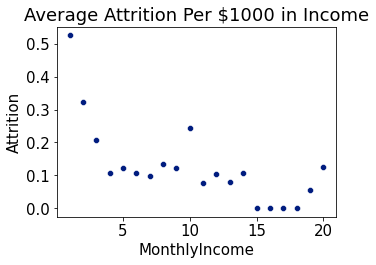

In [20]:
income_gb=income_df.groupby('MonthlyIncome').mean()
plt.figure(figsize=(5,3.5))
sns.scatterplot(x='MonthlyIncome',y='Attrition',data=income_gb)
plt.title('Average Attrition Per $1000 in Income')
plt.show()

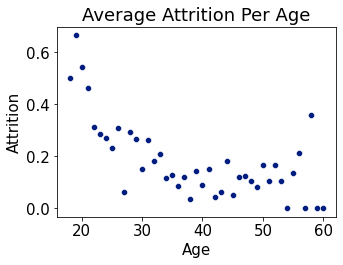

In [21]:
age_gb = data.groupby('Age').mean()
plt.figure(figsize=(5,3.5))
sns.scatterplot(x='Age',y='Attrition',data=age_gb)
plt.title('Average Attrition Per Age')
plt.show()

There is a clear relationship showing that younger workers tend to have higher Attrition that would make sense since they would switch jobs

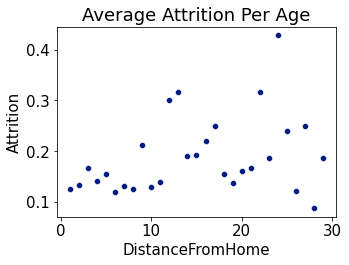

In [22]:
home_gb = data.groupby('DistanceFromHome').mean()
plt.figure(figsize=(5,3.5))
sns.scatterplot(x='DistanceFromHome',y='Attrition',data=home_gb)
plt.title('Average Attrition Per Age')
plt.show()

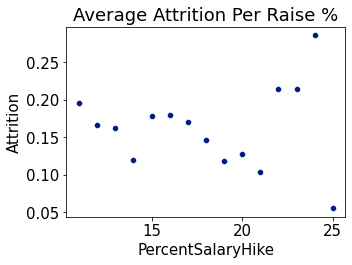

In [23]:
raise_gb = data.groupby('PercentSalaryHike').mean()
plt.figure(figsize=(5,3.5))
sns.scatterplot(x='PercentSalaryHike',y='Attrition',data=raise_gb)
plt.title('Average Attrition Per Raise %')
plt.show()

The variance at the end is very likely due to sampling error

It looks like there may be a relationship but because the variance increases with additional distance, it should be said that there is a smaller sample size with increases in DistanceFromHome that could explain it

As seen above, visual representations confirm the results of the most important features.

### 11. Suggest proper solution to reduce the attrition rate.

Although the models aren't very reliable, it can clearly be seen visually that there are a lot of factors in play in Attrition.

Salary, Age, Distance from Home, and Raise.

All of the above have been shown to be important features by the best performing model.

As such the solutions should relate to these factors

For Salary, It is clear that there is a negative relationship between salary and Attrition. Salaries must be competitive to lower Attrition.

Ther is also a negative relationship between Age and Attrition. As expected, the older one is, the less Attrition there is, except the very old that likely left due to retirement. Incentives can be offered to those retiring to continue working, or to give more responsibilties to the Younger to incentivize them to stay.

For Distance From Home, not much can be done from the companies side except flexible starting and ending time, possibly Work From Home policies, or transportation coverage/incentives.

There is a fairly weak relationship for Raises, but it would be recommended to offer competitive Raises to keep employees